In [45]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [46]:
df_accepted = pd.read_csv("accepted_2007_to_2018Q4.csv")
# df_rejected = pd.read_csv("rejected.csv")

/Users/spencersiegel/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [47]:
print(df_accepted.info())
# print(df_rejected.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB
None


In [91]:
df = df_accepted[df_accepted['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [92]:
df['year'] = df['issue_d'].str.strip().str[-4:]

/Users/spencersiegel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [93]:
df = df[df['year'].isin(['2014', '2015', '2016', '2017', '2018'])]

In [94]:
df.shape
# df.year.value_counts()

(1117353, 152)

In [95]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_last_payment_amount', 'disbursement_method',
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term', 'year'],
      dtype='object', length=152)

In [96]:
total_num = df.isnull().sum().sort_values(ascending=False)

In [97]:
perc = df.isnull().sum()/df.isnull().count() *100
perc1 = (round(perc,2).sort_values(ascending=False))

# Creating a data frame:
df_miss = pd.concat([total_num, perc1], axis =1 , keys =["Total Missing Values", "Percentage %"]).sort_values(by ="Percentage %", ascending = False)

/Users/spencersiegel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [98]:
top_mis = df_miss[df_miss["Percentage %"]<10]
top_mis.reset_index(inplace=True)
vals = list(top_mis['index'])

In [99]:
df = df[vals]

In [100]:
df.shape

(1117353, 94)

In [101]:
num_feat = df.select_dtypes('number').columns.values
df[num_feat].nunique().sort_values()

out_prncp                 1
out_prncp_inv             1
policy_code               1
num_tl_30dpd              5
num_tl_120dpd_2m          6
                     ...   
tot_hi_cred_lim      405175
total_rec_int        464322
last_pymnt_amnt      615092
total_pymnt_inv      878401
total_pymnt         1047071
Length: 69, dtype: int64

In [102]:
df2 = df.dropna()
df2.shape

(857828, 94)

In [103]:
import numpy as np
from itertools import combinations
from scipy.stats import pearsonr

num_feat = df2.select_dtypes('number').columns.values
comb_num_feat = np.array(list(combinations(num_feat, 2)))
corr_num_feat = np.array([])
for comb in comb_num_feat:
    corr = pearsonr(df2[comb[0]], df2[comb[1]])[0]
    corr_num_feat = np.append(corr_num_feat, corr)

In [104]:
corr_num_feat

array([ 0.00099067, -0.01138458,  0.09027691, ...,  0.51360037,
        0.0431025 ,  0.25588534])

In [105]:
high_corr_num = comb_num_feat[np.abs(corr_num_feat) >= 0.8]
high_corr_num

/Users/spencersiegel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater_equal
  """Entry point for launching an IPython kernel.


array([['bc_util', 'percent_bc_gt_75'],
       ['bc_util', 'revol_util'],
       ['bc_open_to_buy', 'total_bc_limit'],
       ['revol_bal', 'total_rev_hi_lim'],
       ['recoveries', 'collection_recovery_fee'],
       ['total_pymnt_inv', 'total_rec_prncp'],
       ['total_pymnt_inv', 'total_pymnt'],
       ['total_pymnt_inv', 'installment'],
       ['total_pymnt_inv', 'funded_amnt_inv'],
       ['total_pymnt_inv', 'funded_amnt'],
       ['total_pymnt_inv', 'loan_amnt'],
       ['total_rec_prncp', 'total_pymnt'],
       ['total_pymnt', 'installment'],
       ['total_pymnt', 'funded_amnt_inv'],
       ['total_pymnt', 'funded_amnt'],
       ['total_pymnt', 'loan_amnt'],
       ['total_il_high_credit_limit', 'total_bal_ex_mort'],
       ['tot_hi_cred_lim', 'tot_cur_bal'],
       ['tot_cur_bal', 'avg_cur_bal'],
       ['num_actv_bc_tl', 'num_bc_sats'],
       ['num_actv_bc_tl', 'num_rev_tl_bal_gt_0'],
       ['num_actv_bc_tl', 'num_actv_rev_tl'],
       ['installment', 'funded_amnt_inv'],
 

In [106]:
df3 = df2.drop(np.unique(high_corr_num[:, 0]), axis=1, errors='ignore')
df3.shape

(857828, 74)

In [107]:
df3.head()

,mths_since_recent_inq,emp_title,emp_length,num_tl_120dpd_2m,mo_sin_old_il_acct,title,percent_bc_gt_75,mths_since_recent_bc,last_pymnt_d,revol_util,...,num_accts_ever_120_pd,mort_acc,mo_sin_rcnt_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,loan_status,loan_amnt,last_pymnt_amnt,last_fico_range_low,zip_code
0,4.0,leadman,10+ years,0.0,148.0,Debt consolidation,0.0,4.0,Jan-2019,29.7,...,2.0,1.0,3.0,3.0,128.0,Fully Paid,3600.0,122.67,560.0,190xx
1,0.0,Engineer,10+ years,0.0,113.0,Business,7.7,2.0,Jun-2016,19.2,...,0.0,4.0,2.0,2.0,192.0,Fully Paid,24700.0,926.35,695.0,577xx
4,1.0,Contract Specialist,3 years,0.0,128.0,Major purchase,60.0,4.0,Jul-2016,64.5,...,0.0,6.0,4.0,4.0,210.0,Fully Paid,10400.0,10128.96,700.0,174xx
6,10.0,Vice President of Recruiting Operations,10+ years,0.0,142.0,Debt consolidation,100.0,12.0,Nov-2016,84.5,...,0.0,4.0,10.0,10.0,306.0,Fully Paid,20000.0,15681.05,650.0,550xx
7,8.0,road driver,10+ years,0.0,149.0,Major purchase,0.0,32.0,Jan-2017,5.7,...,1.0,3.0,13.0,32.0,55.0,Fully Paid,20000.0,14618.23,670.0,293xx


In [108]:
# df3.info()
df3['loan_status'].value_counts()

Fully Paid     682561
Charged Off    175267
Name: loan_status, dtype: int64

In [109]:
# df3.drop(['emp_title', ])
df4 = df3.select_dtypes(include='object')

In [110]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 857828 entries, 0 to 2260697
Data columns (total 25 columns):
emp_title               857828 non-null object
emp_length              857828 non-null object
title                   857828 non-null object
last_pymnt_d            857828 non-null object
pymnt_plan              857828 non-null object
purpose                 857828 non-null object
sub_grade               857828 non-null object
year                    857828 non-null object
verification_status     857828 non-null object
url                     857828 non-null object
term                    857828 non-null object
initial_list_status     857828 non-null object
id                      857828 non-null object
home_ownership          857828 non-null object
hardship_flag           857828 non-null object
grade                   857828 non-null object
earliest_cr_line        857828 non-null object
disbursement_method     857828 non-null object
debt_settlement_flag    857828 non-null ob

In [111]:
# MAYBE FEATURE ENGINEER REGION FROM "ADDR_STATE"
# - create interest rate factor type variable

In [112]:
drop_col = ['emp_title', 
            'title', 
            'last_pymnt_d', 
            'pymnt_plan', 
            'url', 'id', 
            'hardship_flag', 
            'grade', 
            'earliest_cr_line', 
            'year', 
            'last_credit_pull_d', 
            'zip_code',
            
            ##numeral variables
            'last_fico_range_low',
            'last_pymnt_amnt',
            ]

In [113]:
df3 = df3.drop(drop_col, axis=1)

In [114]:
df3.shape

(857828, 60)

In [115]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 857828 entries, 0 to 2260697
Data columns (total 60 columns):
mths_since_recent_inq         857828 non-null float64
emp_length                    857828 non-null object
num_tl_120dpd_2m              857828 non-null float64
mo_sin_old_il_acct            857828 non-null float64
percent_bc_gt_75              857828 non-null float64
mths_since_recent_bc          857828 non-null float64
revol_util                    857828 non-null float64
dti                           857828 non-null float64
policy_code                   857828 non-null float64
pub_rec                       857828 non-null float64
pub_rec_bankruptcies          857828 non-null float64
purpose                       857828 non-null object
acc_now_delinq                857828 non-null float64
sub_grade                     857828 non-null object
tax_liens                     857828 non-null float64
verification_status           857828 non-null object
total_rev_hi_lim            

In [116]:
# df4['num_tl_120dpd_2m'].value_counts()

In [117]:
df4 = df3.select_dtypes(include='object')
categorical_features = list(df4.columns)

In [118]:
#categories
for col in categorical_features:
        df3[col] = df3[col].astype('category')

In [119]:
df3['policy_code'] = df3['policy_code'].astype('category')

In [120]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 857828 entries, 0 to 2260697
Data columns (total 60 columns):
mths_since_recent_inq         857828 non-null float64
emp_length                    857828 non-null category
num_tl_120dpd_2m              857828 non-null float64
mo_sin_old_il_acct            857828 non-null float64
percent_bc_gt_75              857828 non-null float64
mths_since_recent_bc          857828 non-null float64
revol_util                    857828 non-null float64
dti                           857828 non-null float64
policy_code                   857828 non-null category
pub_rec                       857828 non-null float64
pub_rec_bankruptcies          857828 non-null float64
purpose                       857828 non-null category
acc_now_delinq                857828 non-null float64
sub_grade                     857828 non-null category
tax_liens                     857828 non-null float64
verification_status           857828 non-null category
total_rev_hi_lim   

In [121]:
libor = pd.read_csv('libor.csv')
libor.head()

,month,libor
0,Jan-2020,1.66
1,Dec-2019,1.76
2,Nov-2019,1.69
3,Oct-2019,1.79
4,Sep-2019,2.02


In [122]:
df3['issue_d'] = df3['issue_d'].astype('object')
df123 = pd.merge(df3, libor, left_on='issue_d', right_on='month')
df123.head()

,mths_since_recent_inq,emp_length,num_tl_120dpd_2m,mo_sin_old_il_acct,percent_bc_gt_75,mths_since_recent_bc,revol_util,dti,policy_code,pub_rec,...,acc_open_past_24mths,num_accts_ever_120_pd,mort_acc,mo_sin_rcnt_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,loan_status,loan_amnt,month,libor
0,4.0,10+ years,0.0,148.0,0.0,4.0,29.7,5.91,1.0,0.0,...,4.0,2.0,1.0,3.0,3.0,128.0,Fully Paid,3600.0,Dec-2015,0.42
1,0.0,10+ years,0.0,113.0,7.7,2.0,19.2,16.06,1.0,0.0,...,4.0,0.0,4.0,2.0,2.0,192.0,Fully Paid,24700.0,Dec-2015,0.42
2,1.0,3 years,0.0,128.0,60.0,4.0,64.5,25.37,1.0,0.0,...,10.0,0.0,6.0,4.0,4.0,210.0,Fully Paid,10400.0,Dec-2015,0.42
3,10.0,10+ years,0.0,142.0,100.0,12.0,84.5,14.67,1.0,0.0,...,6.0,0.0,4.0,10.0,10.0,306.0,Fully Paid,20000.0,Dec-2015,0.42
4,8.0,10+ years,0.0,149.0,0.0,32.0,5.7,17.61,1.0,0.0,...,4.0,1.0,3.0,13.0,32.0,55.0,Fully Paid,20000.0,Dec-2015,0.42


In [123]:
df123 = df123.drop('month', axis=1)
df123.shape

(857828, 61)

In [124]:
#df123['int_rate_over_libor'] = df123['int_rate']/(df123['libor'])
# df123[['issue_d', 'int_rate', 'libor', 'int_rate_over_libor']]

In [125]:
#dropped these two because too many unique values. Maybe we can feature engineer them down.
df123 = df123.drop(['issue_d','addr_state'], axis=1)
data=df123.copy().sample(n=50000, random_state=1)
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object', 'category']).columns
categorical_features=categorical_features.drop(['loan_status'])
X = data.loc[:, data.columns != 'loan_status']
# Create a new dataframe y that includes only our 
y = data.loan_status

In [166]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
#from sklearn.impute import Imputer
from sklearn.compose import ColumnTransformer


#1 Inner Pipeline1: Create a numeric transformer with 2 steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'median'))])

#2 Inner Pipeline2: Create a categorical transformer with 2 steps
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))])

#3 Create Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

0.9362666666666667
              precision    recall  f1-score   support

 Charged Off       1.00      0.69      0.82      3076
  Fully Paid       0.93      1.00      0.96     11924

    accuracy                           0.94     15000
   macro avg       0.96      0.85      0.89     15000
weighted avg       0.94      0.94      0.93     15000



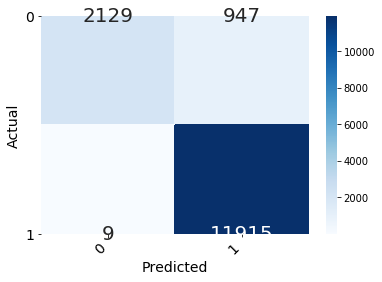

In [167]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.feature_selection import SelectFromModel, SelectKBest
from xgboost import XGBClassifier
from matplotlib import pyplot as plt
MainPipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(n_estimators=90) )])
#('fs',SelectFromModel(ExtraTreesClassifier())),
# split sample into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y,random_state=42)  # random_state=21 # stratify=y


# Fit Model
MainPipe.fit(X_train,y_train)

# Predict model
y_pred = MainPipe.predict(X_test)

# Output the accuracy of our prediction
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

# Visualize the confusion matrix to make it easier to read
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(con_matrix, ('0', '1'), ('0', '1'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d", cmap="Blues")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.xlabel('Predicted', fontsize = 14)

# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [193]:
mult_value=[]
for col in pd.get_dummies(X_train,drop_first=True):
    mult_value.append(len(pd.get_dummies(X_train,drop_first=True)[col].unique())!=1)

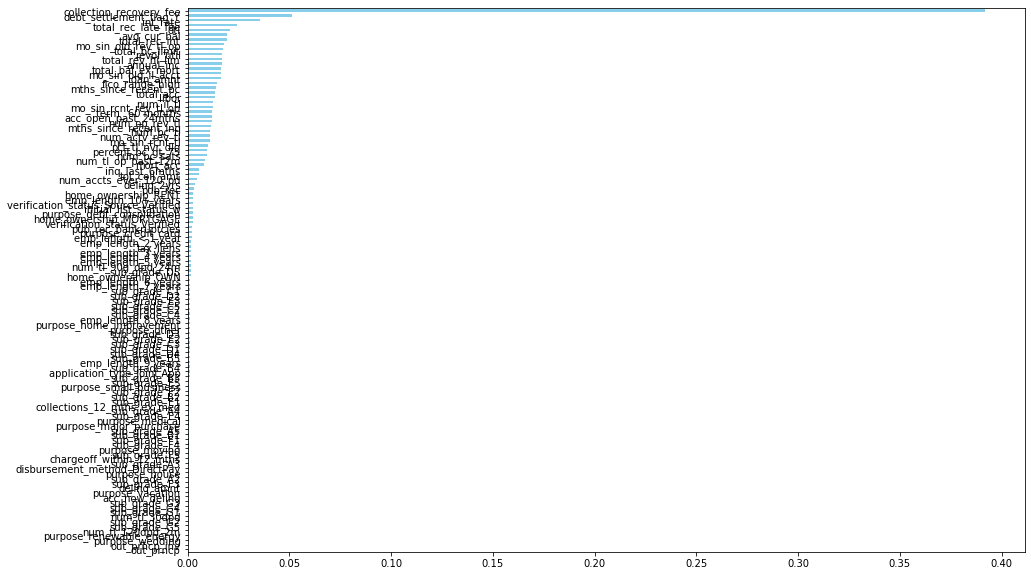

In [207]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a pd.Series of features importances
importances_rf = pd.Series(MainPipe.named_steps['classifier'].feature_importances_, index = pd.get_dummies(X,drop_first=True).drop(['home_ownership_NONE','purpose_educational'],axis=1).columns)

# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()

# Make a horizontal bar plot
plt.figure(figsize=(15,10))
sorted_importances_rf.plot(kind='barh', color='skyblue'); 
plt.show()

In [233]:
sorted_importances_rf[-30:]

num_bc_sats               0.015699
percent_bc_gt_75          0.016109
pct_tl_nvr_dlq            0.016923
term_ 60 months           0.017208
num_actv_rev_tl           0.018289
mo_sin_rcnt_tl            0.018879
num_op_rev_tl             0.018884
num_bc_tl                 0.019662
mths_since_recent_inq     0.020307
acc_open_past_24mths      0.020441
mo_sin_rcnt_rev_tl_op     0.020582
num_il_tl                 0.020748
libor                     0.021065
fico_range_high           0.022729
mths_since_recent_bc      0.023224
total_acc                 0.023971
loan_amnt                 0.027896
mo_sin_old_il_acct        0.028086
total_bal_ex_mort         0.028348
annual_inc                0.028439
total_rev_hi_lim          0.029282
revol_util                0.029466
total_bc_limit            0.029614
mo_sin_old_rev_tl_op      0.030433
avg_cur_bal               0.031887
total_rec_int             0.033246
dti                       0.034105
total_rec_late_fee        0.034444
int_rate            

Use the above to drop features (i have shown some examples below) that are not helpful in prediction. These are features that we would not know prior to investing in a loan. 

Then we can recreate the model and train and test on that.

In [210]:
df123 = df123.drop(['collection_recovery_fee','debt_settlement_flag','total_rec_late_fee'], axis=1)
data=df123.copy().sample(n=50000, random_state=1)
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object', 'category']).columns
categorical_features=categorical_features.drop(['loan_status'])
X = data.loc[:, data.columns != 'loan_status']
# Create a new dataframe y that includes only our 
y = data.loan_status

In [212]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
#from sklearn.impute import Imputer
from sklearn.compose import ColumnTransformer


#1 Inner Pipeline1: Create a numeric transformer with 2 steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'median'))])

#2 Inner Pipeline2: Create a categorical transformer with 2 steps
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))])

#3 Create Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

0.8299333333333333
              precision    recall  f1-score   support

 Charged Off       0.81      0.22      0.35      3076
  Fully Paid       0.83      0.99      0.90     11924

    accuracy                           0.83     15000
   macro avg       0.82      0.60      0.63     15000
weighted avg       0.83      0.83      0.79     15000



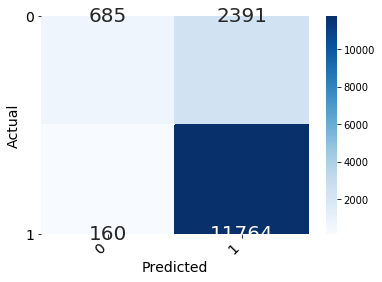

In [213]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.feature_selection import SelectFromModel, SelectKBest
from xgboost import XGBClassifier
from matplotlib import pyplot as plt
MainPipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(n_estimators=90) )])
#('fs',SelectFromModel(ExtraTreesClassifier())),
# split sample into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y,random_state=42)  # random_state=21 # stratify=y


# Fit Model
MainPipe.fit(X_train,y_train)

# Predict model
y_pred = MainPipe.predict(X_test)

# Output the accuracy of our prediction
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

# Visualize the confusion matrix to make it easier to read
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(con_matrix, ('0', '1'), ('0', '1'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d", cmap="Blues")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.xlabel('Predicted', fontsize = 14)

# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

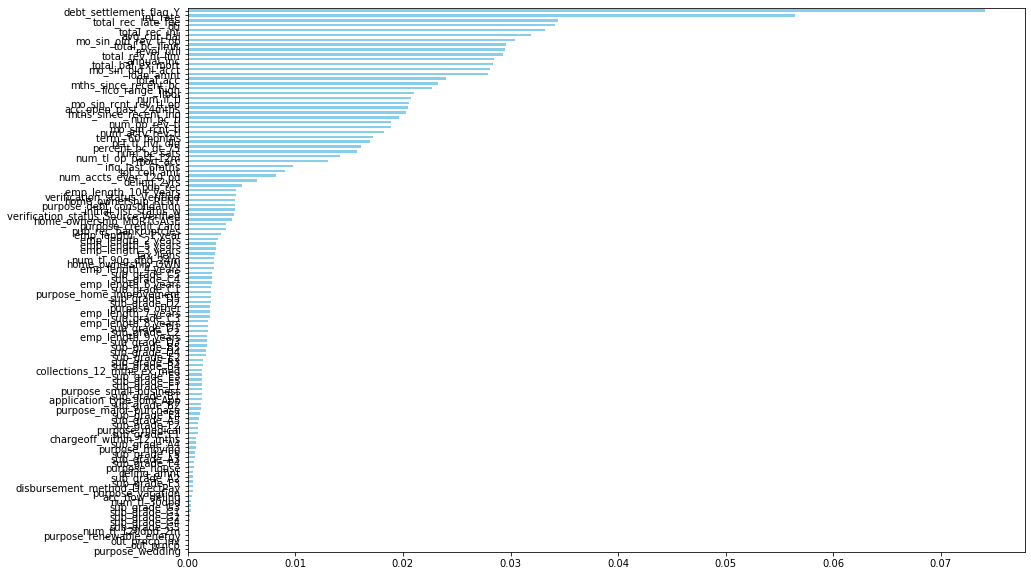

In [214]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a pd.Series of features importances
importances_rf = pd.Series(MainPipe.named_steps['classifier'].feature_importances_, index = pd.get_dummies(X,drop_first=True).drop(['home_ownership_NONE','purpose_educational'],axis=1).columns)

# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()

# Make a horizontal bar plot
plt.figure(figsize=(15,10))
sorted_importances_rf.plot(kind='barh', color='skyblue'); 
plt.show()